In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [549]:
### We are using a medical dataset containing patient's medical information. The dependent variable here is called 'stroke'

In [550]:
f = pd.read_csv ('train.csv')

In [551]:
f.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0


In [552]:
## dropping the first column 'id' since it evidently is inconsequential to our classification

In [553]:
f.drop ('id', axis = 'columns', inplace = True)

In [554]:
f.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [555]:
from imblearn.over_sampling import SMOTE

In [556]:
f.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [621]:
### class imbalance would cause the model to be biased towards the majority class, which we don't condone

# Exploratory Data Analysis

In [557]:
f.shape

(15304, 11)

In [558]:
f.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [559]:
## range of ages
f.age.max() - f.age.min()

81.92

In [560]:
f['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [561]:
## performing a few groupbys and crosstabs to further understand our dataset before proceeding to visualizations

In [562]:
f.stroke.groupby([f.gender, f.smoking_status, f.stroke]).count()

gender  smoking_status   stroke
Female  Unknown          0         2484
                         1           65
        formerly smoked  0         1263
                         1           74
        never smoked     0         4101
                         1          173
        smokes           0         1230
                         1           56
Male    Unknown          0         1950
                         1           43
        formerly smoked  0          915
                         1           85
        never smoked     0         1923
                         1           84
        smokes           0          805
                         1           52
Other   Unknown          0            1
Name: stroke, dtype: int64

In [563]:
f.bmi.groupby(f.smoking_status).agg(['mean', 'max', 'min'])

,mean,max,min
smoking_status,,,
Unknown,24.962738,80.1,10.3
formerly smoked,30.042918,60.9,14.1
never smoked,29.125181,65.9,14.3
smokes,29.718059,61.8,15.9


In [564]:
pd.crosstab (index = f.gender, columns = f.Residence_type, values = f.stroke, aggfunc = ['count'])

count        
Residence_type   Rural   Urban
gender                        
Female          4720.0  4726.0
Male            2943.0  2914.0
Other              1.0     NaN

In [565]:
## let us visualize the data

In [566]:
f.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0


In [567]:
import seaborn as sns

In [568]:
f.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: >

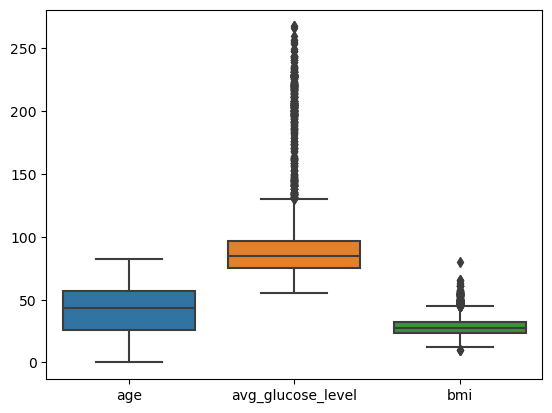

In [569]:
g = f[['age', 'avg_glucose_level', 'bmi']]
sns.boxplot (g)

In [570]:
## the 'avg_glucose_level' seems to have many outliers

In [571]:
f.hypertension.value_counts(), f.heart_disease.value_counts()

(0    14543
 1      761
 Name: hypertension, dtype: int64,
 0    14947
 1      357
 Name: heart_disease, dtype: int64)

In [572]:
### these column can be treated as object variables. We will make the necessary conversion during preprocessing

<Axes: ylabel='work_type'>

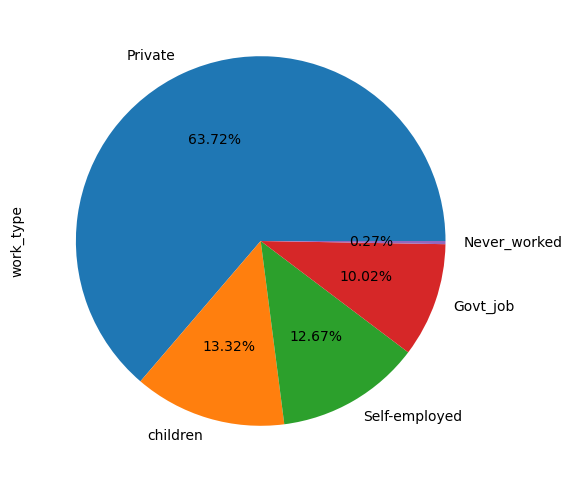

In [573]:
plt.figure(figsize = (6,6))
f.work_type.value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

In [574]:
f.avg_glucose_level.skew()

3.0372415072996914

In [575]:
### skew() method quantifies the asymmetry of the distribution

In [576]:
### typically, any value between -0.5 to +0.5 implies that the distribution is more or less symmetric about its mean

In [577]:
f.bmi.skew()

0.71305081171682

# Preprocessing

In [578]:
## converting those int columns to object types

In [579]:
f.hypertension = f.hypertension.astype('object')

In [580]:
f.heart_disease = f.heart_disease.astype('object')

In [582]:
f.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [583]:
from scipy import stats

In [584]:
f.shape

(15304, 11)

In [585]:
f.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [586]:
f.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [587]:
f = f.drop_duplicates()
f.shape

(15304, 11)

In [589]:
## f = f [(np.abs(stats.zscore(numerical))<3).all(axis='columns')]
## f.shape

In [622]:
### we will not perform any outlier removal now since the data already has class imbalance

In [590]:
f.avg_glucose_level.skew(), f.bmi.skew()

(3.0372415072996914, 0.71305081171682)

<Axes: >

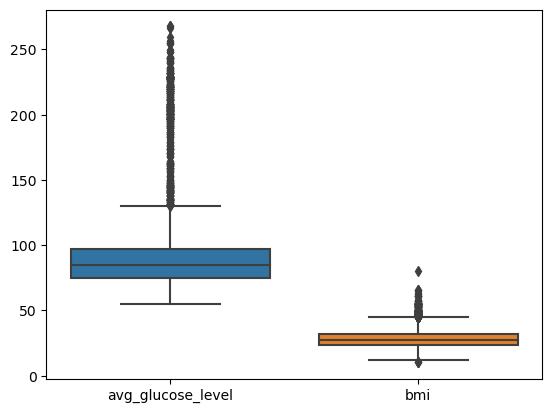

In [591]:
g = f[['avg_glucose_level', 'bmi']]
sns.boxplot(g)

In [592]:
num = f.select_dtypes (include = 'number')
np.abs(stats.zscore(num))

,age,avg_glucose_level,bmi,stroke
0,0.625710,0.373297,0.444397,0.207546
1,0.392544,0.416084,0.626698,0.207546
2,0.027154,0.547988,1.813018,0.207546
3,0.680018,0.948757,0.102242,0.207546
4,0.812243,0.615493,0.102242,0.207546
...,...,...,...,...
15299,0.905509,0.644148,1.281255,0.207546
15300,0.213687,0.476939,0.593160,0.207546
15301,1.566048,0.052987,0.284542,0.207546
15302,0.213687,0.474584,0.834966,0.207546


In [593]:
f.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [594]:
### the dataset clearly has class imbalance

In [595]:
f.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0


In [596]:
x = f.iloc[:,:-1]
y = f.stroke

In [597]:
x_num = x.select_dtypes (include = 'number')
x_obj = x.select_dtypes (include = 'object')

In [598]:
from sklearn.preprocessing import MinMaxScaler

In [599]:
scaler = MinMaxScaler()
x_num_s = scaler.fit_transform(x_num)
x_num_s = pd.DataFrame(x_num_s, columns = x_num.columns, index = x_num.index)
x_num_s.head(5)

,age,avg_glucose_level,bmi
0,0.340820,0.114465,0.297994
1,0.401855,0.109332,0.194842
2,0.511719,0.224974,0.429799
3,0.682617,0.045437,0.265043
4,0.291992,0.085413,0.265043


In [600]:
x_num_s.describe()

,age,avg_glucose_level,bmi
count,15304.000000,15304.000000,15304.000000
mean,0.504611,0.159242,0.255197
std,0.261776,0.119955,0.096308
min,0.000000,0.000000,0.000000
25%,0.316406,0.092664,0.189112
50%,0.523926,0.140785,0.247851
75%,0.694824,0.196629,0.310888
max,1.000000,1.000000,1.000000


In [601]:
x_obj_e = pd.get_dummies (x_obj, drop_first = False, dtype = int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5056\2342079193.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_obj_e = pd.get_dummies (x_obj, drop_first = False, dtype = int)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5056\2342079193.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_obj_e = pd.get_dummies (x_obj, drop_first = False, dtype = int)


In [602]:
X = pd.concat([x_num_s, x_obj_e], axis = 'columns')
X.head(3)

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.340820,0.114465,0.297994,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0.401855,0.109332,0.194842,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0.511719,0.224974,0.429799,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0


In [603]:
X.isna().sum()

age                               0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
hypertension_0                    0
hypertension_1                    0
heart_disease_0                   0
heart_disease_1                   0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [604]:
sm = SMOTE()
new_X, new_y = sm.fit_resample(X, y)

In [605]:
new_X.shape, new_y.shape

((29344, 23), (29344,))

In [606]:
from sklearn.model_selection import train_test_split

In [607]:
xtrain, xtest, ytrain, ytest = train_test_split (new_X, new_y, random_state = 5)

In [608]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape) 
print(ytest.shape)

(22008, 23)
(7336, 23)
(22008,)
(7336,)


In [609]:
from sklearn.linear_model import LogisticRegression

In [610]:
lr = LogisticRegression()

In [611]:
lr.fit (xtrain, ytrain)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [612]:
lr.intercept_, lr.coef_

(array([15.67160951]),
 array([[ 9.22261112,  1.60774796,  1.6719804 , -3.56618536, -3.54928288,
         -0.02511552, -3.05573244, -3.01811555, -3.40207822, -4.07739278,
         -4.26195099, -3.58889455, -3.36043789, -1.02879806, -2.99407653,
         -3.75784034, -2.65584731, -2.8015589 , -2.78844708, -3.70647177,
         -3.6486903 , -3.43224076, -3.12526411]]))

In [613]:
xtrain ['probability'] = lr.predict_proba(xtrain) [:,1]

In [614]:
xtrain.head(5)

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,probability
2356,0.157715,0.024249,0.223496,1,0,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,0.002702
10641,0.621582,0.227564,0.219198,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0.337563
17430,0.963379,0.145728,0.234598,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0.913659
18815,0.934806,0.668429,0.260105,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0.996262
20519,0.697173,0.089209,0.333946,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0.964465


In [615]:
ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [616]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [617]:
for threshold in np.arange(0, 1.1, 0.1):
    pred = (xtrain['probability'] > threshold).astype(int)
    cm = confusion_matrix(ytrain, pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    ROC.loc[len(ROC.index)] = {'Threshold': threshold ,'TP': TP ,'TN': TN ,'FP': FP,'FN': FN,'TPR': TPR,'FPR': FPR}

In [618]:
ROC

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,11016,0,10992,0,1.000000,1.000000
1,0.1,10964,5145,5847,52,0.995280,0.531932
2,0.2,10775,6496,4496,241,0.978123,0.409025
3,0.3,10465,7417,3575,551,0.949982,0.325237
4,0.4,9976,8206,2786,1040,0.905592,0.253457
5,0.5,9352,8945,2047,1664,0.848947,0.186226
6,0.6,8619,9526,1466,2397,0.782407,0.133370
7,0.7,7671,9932,1060,3345,0.696351,0.096434
8,0.8,6307,10355,637,4709,0.572531,0.057951
9,0.9,3837,10795,197,7179,0.348312,0.017922


In [619]:
auc = roc_auc_score(ytrain, xtrain.probability)
auc

0.9147948276768793

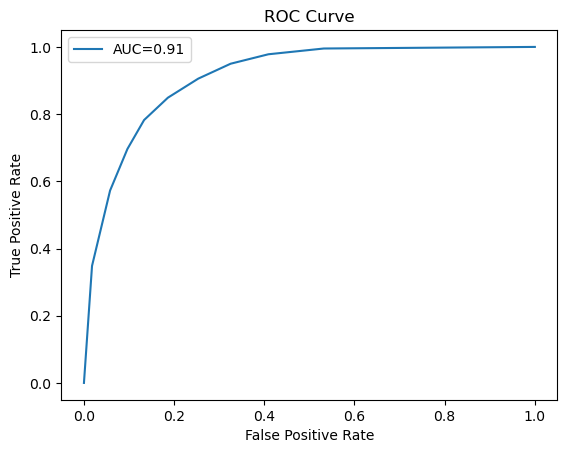

In [620]:
plt.plot(ROC['FPR'], ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()